In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'E:\Fatec\ADS\SEMESTRE 3\ESTRUTURAS DE DADOS\Analise de Dados\dados_saude.csv'
df = pd.read_csv(filename, delimiter=';',
                 encoding = 'ISO-8859-1',
                 error_bad_lines = False)

c:\users\black\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18,59,61,62,63,103,105,117,119,126,128,129,130,132) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(393979, 134)

In [4]:
#Colunas na tabela a ser utilizada
for k in (0,7,11, 13, 22, 118, 121):
    print (k, df.columns[k])

0 DT_NOTIFIC
7 ID_MUNICIP
11 CS_SEXO
13 NU_IDADE_N
22 SG_UF
118 CLASSI_FIN
121 EVOLUCAO


In [5]:
#Criação da tabela que vamos utilizar
df = df[['DT_NOTIFIC','ID_MUNICIP', 'CS_SEXO', 'NU_IDADE_N', 'SG_UF', 'CLASSI_FIN', 'EVOLUCAO']]

In [6]:
#Atribuição de valores 
troca_classificação = {1:'SRAG por influenza',
                       2: 'SRAG por outro vírus respiratório',
                       3: 'SRAG por outro agente Etiológico',
                       4: 'SRAG não especificado',
                       5: 'COVID-19'}

troca_evolução = {1:'Cura', 2:'Óbito', 9:'Ignorado'}

In [7]:
#Alocação dos valores dos dicionários dentro das colunas
df.loc[(df.CLASSI_FIN.isnull()), 'CLASSI_FIN'] = 4
df['CLASSI_FIN'] = df['CLASSI_FIN'].apply(lambda x: troca_classificação[x])

df.loc[(df.EVOLUCAO.isnull()), 'EVOLUCAO'] = 9
df['EVOLUCAO'] = df['EVOLUCAO'].apply(lambda x: troca_evolução[x])

In [67]:
#amostra da tabela (20 ocorrências)
df.sample(20).sort_values('ID_MUNICIP')

,DT_NOTIFIC,ID_MUNICIP,CS_SEXO,NU_IDADE_N,SG_UF,CLASSI_FIN,EVOLUCAO
270110,14/04/2020,BELEM,M,36,PA,COVID-19,Cura
206965,26/05/2020,BELO HORIZONTE,F,82,MG,SRAG não especificado,Ignorado
269161,13/06/2020,CARAGUATATUBA,F,38,SP,SRAG não especificado,Ignorado
60326,17/04/2020,CUIABA,M,29,MT,COVID-19,Cura
1089,24/01/2020,CURITIBA,F,41,PR,SRAG não especificado,Cura
107365,29/03/2020,ELISIO MEDRADO,F,90,BA,SRAG não especificado,Ignorado
175059,24/05/2020,FORTALEZA,M,79,CE,COVID-19,Óbito
223779,19/06/2020,MANAUS,F,39,AM,COVID-19,Cura
112099,07/05/2020,PASSO FUNDO,F,24,RS,SRAG não especificado,Cura
358300,30/06/2020,PORTO VELHO,M,41,RO,COVID-19,Ignorado


In [28]:
#Quantidade de ocorrência de COVID-19 por municípios
df.query('CLASSI_FIN == "COVID-19"').groupby('ID_MUNICIP').size().sort_values(ascending=False)

ID_MUNICIP
SAO PAULO          35884
RIO DE JANEIRO     16647
FORTALEZA           8663
RECIFE              7447
MANAUS              4730
                   ...  
MUCUM                  1
SIMAO DIAS             1
CHOPINZINHO            1
MORRO DA FUMACA        1
LAGOA GRANDE           1
Length: 1792, dtype: int64

Text(0.5, 1.0, 'Dez cidades com mais casos de COVID-19')

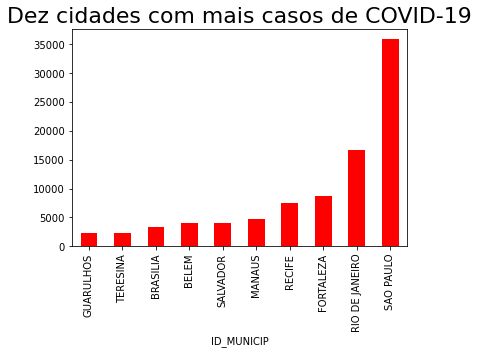

In [9]:
#Gráfico das 10 cidades com maior ocorrência de COVID-19
df.query('CLASSI_FIN == "COVID-19"').groupby('ID_MUNICIP').size().sort_values().tail(10).plot(kind='bar', color='red').set_title('Dez cidades com mais casos de COVID-19', fontsize=22)

In [21]:
#Lista com o total de casos de COVID-19 por estado
df.query('CLASSI_FIN == "COVID-19"').groupby('SG_UF').size().sort_values(ascending=False)

SG_UF
SP    65122
RJ    24965
CE    12464
PA    10316
PE    10093
AM     7394
MT     7188
BA     5778
MG     5475
RS     4324
PR     3566
DF     3136
MA     2829
PI     2522
PB     2448
AL     2197
GO     2164
RN     2113
ES     1998
SC     1866
SE     1371
MS      858
RO      760
TO      669
RR      358
AC      357
AP      349
dtype: int64

Text(0.5, 1.0, 'Dez estados com mais casos de COVID-19')

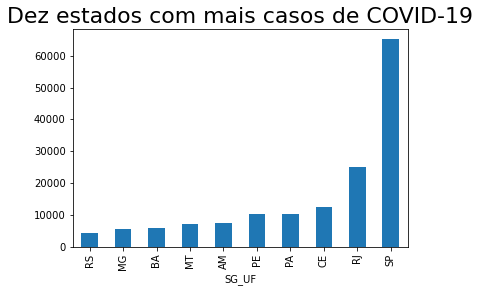

In [38]:
#Grafico com os 10 estados com maior casos de COVID-19
df.query('CLASSI_FIN == "COVID-19"').groupby('SG_UF').size().sort_values().tail(10).plot(kind='bar').set_title('Dez estados com mais casos de COVID-19', fontsize=22)

Text(0.5, 1.0, 'Óbito por COVID-19 por Estado')

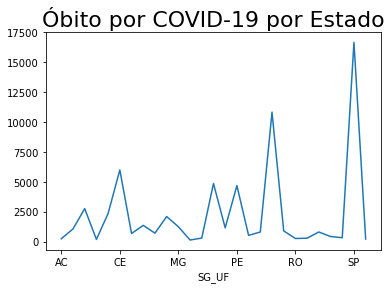

In [39]:
#Gráfico com a Quantidade de òbitos por COVID-19 por Estados
df.query('EVOLUCAO == "Óbito" and CLASSI_FIN == "COVID-19"').groupby('SG_UF').size().plot(kind='line').set_title('Óbito por COVID-19 por Estado', fontsize = 22)

In [36]:
#Quantidade de casos de COVID-19
df.query('CLASSI_FIN == "COVID-19"').groupby('EVOLUCAO').size().sort_values(ascending=False)

EVOLUCAO
Cura        77747
Óbito       61830
Ignorado    43125
dtype: int64